# **Proyecto: API de Análisis de Sentimientos**

##  **Descripción del Proyecto**
Crear una **API simple** que recibe textos (comentarios, reseñas o tweets), aplica un **modelo de Data Science** para clasificar el sentimiento y devuelve el resultado en formato **JSON**, permitiendo que las aplicaciones consuman esta predicción automáticamente.

### **Opciones de Clasificación**
- **Binaria**: Positivo / Negativo
- **Ternaria**: Positivo / Neutro / Negativo

##  **Alcance Recomendado**
Clasificación con un **modelo simple** usando:
- **TF-IDF**: Técnica que transforma texto en números, mostrando qué palabras son más importantes
- **Regresión Logística**: Modelo de aprendizaje automático que aprende a diferenciar sentimientos

##  **Objetivos del Proyecto**

### **1.  Exploración y Limpieza de Datos (EDA)**
- Análisis exploratorio de los datos de texto
- Limpieza de datos: manejo de valores nulos, duplicados
- Preprocesamiento de texto: lowercasing, eliminación stopwords, etc.

### **2.  Transformación de Textos con TF-IDF**
- Convertir texto en representación numérica
- Creación de matriz de características
- Selección de características más relevantes

### **3.  Entrenamiento del Modelo Supervisado**
- **Opción A**: Regresión Logística
- **Opción B**: Naive Bayes
- **Opción C**: Support Vector Machines (SVM)
- División de datos: train/test split
- Validación cruzada

### **4.  Métricas de Desempeño**
- **Accuracy**: Precisión general del modelo
- **Precision**: Exactitud en predicciones positivas
- **Recall**: Capacidad de encontrar todos los positivos
- **F1-Score**: Balance entre Precision y Recall
- Matriz de confusión

### **5.  Serialización del Modelo**
- Guardar modelo entrenado con `joblib` o `pickle`
- Guardar vectorizador TF-IDF
- Crear pipeline completo
- Versionado de modelos


### Aqui irian todos los **IMPORTS NECESARIOS**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Para la impieza de datos
import re
import nltk
from nltk.corpus import stopwords

# Para los modelos
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
# Para las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, balanced_accuracy_score, matthews_corrcoef


!pip install emoji
import emoji

In [59]:
# Configurar visualizaciones
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline
print("Librerias cargadas correctamente")

Librerias cargadas correctamente


# Lectura del DataSet

## Español

In [60]:
# #unificando los csv's
# df_train = pd.read_csv('train.csv')
# df_test = pd.read_csv('test.csv')
# df_valid = pd.read_csv('valid.csv')

# print("Archivos cargados:")
# print(f" train.csv: {df_train.shape[0]} filas")
# print(f" test.csv: {df_test.shape[0]} filas")
# print(f" valid.csv: {df_valid.shape[0]} filas")

# df = pd.concat([df_train, df_test, df_valid], ignore_index=True)


# #filtra solo positivo y negativo
# df = df[df['label'].isin(['positive', 'negative'])]

# #crea nueva columnas binaria
# df['label_binario'] = df['label'].apply(lambda x: 1 if x == 'positive' else 0)

# print("Dataset cargado exitosamente!")
# print(f"Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas\n")

# print("Primeras 20 filas: (columna binaria)")
# print(df[['text', 'label', 'label_binario']].head(20))
# print("\n" + "="*50 + "\n")

# print("Distribucion de sentimientos:")
# print(f"Original: {df['label'].value_counts().to_dict()}")
# print(f"Binario: {df['label_binario'].value_counts().to_dict()}")
# print(f"  0 negativo, 1 = positivo")



## Portugués

In [61]:
#unificando los csv's
#Datasets en portugués
df_train_portuguese = pd.read_csv('train_portuguese.csv')
df_test_portuguese = pd.read_csv('test_portuguese.csv')
df_valid_portuguese = pd.read_csv('valid_portuguese.csv')

print("Archivos en portugués cargados:")
print(f" train.csv: {df_train_portuguese.shape[0]} filas")
print(f" test.csv: {df_test_portuguese.shape[0]} filas")
print(f" valid.csv: {df_valid_portuguese.shape[0]} filas")

df_portuguese = pd.concat([df_train_portuguese, df_test_portuguese, df_valid_portuguese], ignore_index=True)

#filtra solo positivo y negativo
df_portuguese = df_portuguese[df_portuguese['label'].isin(['positive', 'negative'])]

#crea nueva columnas binaria
df_portuguese['label_binario'] = df_portuguese['label'].apply(lambda x: 1 if x == 'positive' else 0)

print("Dataset en portugués cargado exitosamente!")
print(f"Dimensiones: {df_portuguese.shape[0]} filas × {df_portuguese.shape[1]} columnas\n")

print("Primeras 20 filas: (columna binaria)")
print(df_portuguese[['text', 'label', 'label_binario']].head(20))
print("\n" + "="*50 + "\n")

print("Distribucion de sentimientos:")
print(f"Original: {df_portuguese['label'].value_counts().to_dict()}")
print(f"Binario: {df_portuguese['label_binario'].value_counts().to_dict()}")
print(f"  0 negativo, 1 = positivo")

Archivos en portugués cargados:
 train.csv: 1839 filas
 test.csv: 870 filas
 valid.csv: 324 filas
Dataset en portugués cargado exitosamente!
Dimensiones: 2022 filas × 4 columnas

Primeras 20 filas: (columna binaria)
                                                 text     label  label_binario
0   Que gafe do VídeoShow, colocar uma cena de mor...  negative              0
2   A voz da Vanessa da mata é uma coisa maravilho...  positive              1
3   poooooooorra Mirian deixa o cara abrir a panel...  negative              0
5    A Globo ja pode contratar a Mirian #MasterChefBR  positive              1
6   #VideoShowAoVivo @user  que saudades do Wando....  negative              0
8                       A @user está linda! #encontro  positive              1
9   Todo dia é um 7 X 1 diferente...Só TOMBO! #Mas...  negative              0
11         O cabelo dá Ana está maravilhoso #MaisVoce  positive              1
12  gente, q história eh essa q a Ana Luíza foi de...  negative          

# Histograma. Distribución del sentimiento

##Español

In [62]:
# df_hist = pd.DataFrame(df_portuguese['label'].value_counts())


# plt.figure(figsize=(10, 6))

# ax = sns.barplot(
#     data=df_hist,
#     x="label",
#     y="count",
#     hue="label",
#     dodge=False,
#     edgecolor="black",
#     legend=False
# )


# ax.set_title(
#     "Distribución",
#     fontsize=16,
#     fontweight="bold",
#     pad=15
# )

# ax.set_xlabel("Sentimiento", fontsize=12)
# ax.set_ylabel("Cantidad", fontsize=12)


# for container in ax.containers:
#     ax.bar_label(container, fmt="%.0f", fontsize=10, padding=4)


# plt.tight_layout()

# plt.show()

## Portugues

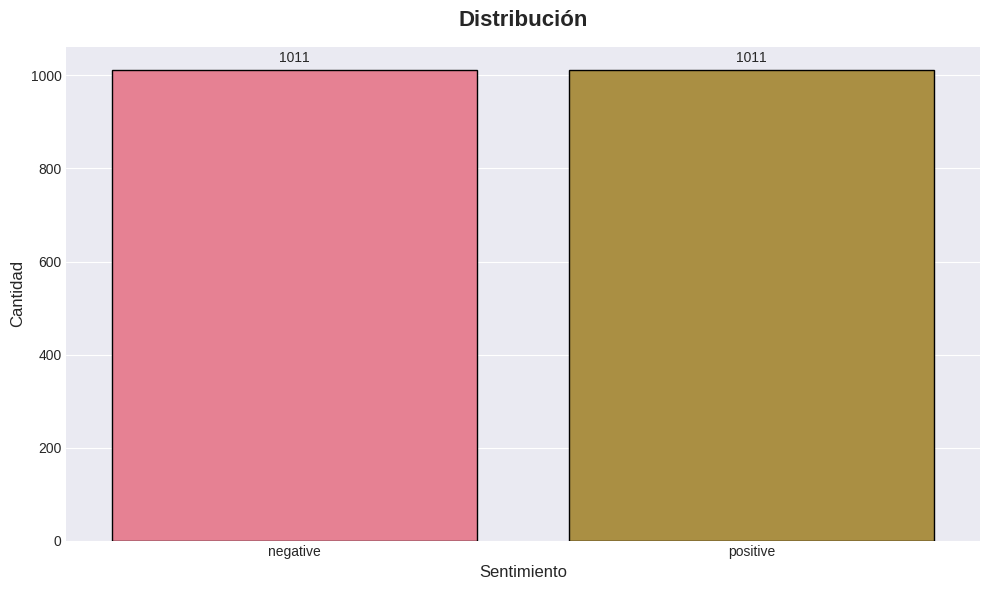

In [63]:
df_hist = pd.DataFrame(df_portuguese['label'].value_counts())


plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=df_hist,
    x="label",
    y="count",
    hue="label",
    dodge=False,
    edgecolor="black",
    legend=False
)


ax.set_title(
    "Distribución",
    fontsize=16,
    fontweight="bold",
    pad=15
)

ax.set_xlabel("Sentimiento", fontsize=12)
ax.set_ylabel("Cantidad", fontsize=12)


for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", fontsize=10, padding=4)


plt.tight_layout()

plt.show()

**Nota**: El dataset en portugués cuenta con la misma cantidad de datos

# Limpieza de datos

In [64]:
nltk.download('stopwords') #descarga la lista de palabras vacias por sesion(una vez)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Español

In [65]:
# stop_words = set(stopwords.words('spanish'))
# negaciones = {"no", "ni", "nunca", "jamás"}
# stop_words = stop_words - negaciones

# def limpiar_texto(texto):
#     texto = str(texto)

#     texto = texto.lower()

#     # Normalizar alargamientos
#     texto = re.sub(r'(.)\1{2,}', r'\1\1', texto)

#     # Eliminar caracteres no alfabéticos
#     #texto = re.sub(r'[^a-záéíóúüñ\s]', ' ', texto)
#     texto = re.sub(r'[^a-záéíóúüñ0-9\s\U0001F300-\U0001F9FF\U0001F600-\U0001F64F]', ' ', texto) #Esta linea es igual a la de arriba pero conserva los emojis

#     # Unir negaciones
#     texto = re.sub(r'\b(no|nunca|jamás)\s+(\w+)', r'\1_\2', texto)

#     palabras = texto.split()
#     palabras = [p for p in palabras if p not in stop_words]

#     return ' '.join(palabras)
# df['texto_limpio'] = df['text'].apply(limpiar_texto)
# print(df.head(10))

## Portugués

In [66]:
stop_words = set(stopwords.words('portuguese'))
negaciones = {"não", "nem", "nunca", "jamais"}
stop_words = stop_words - negaciones

def limpiar_texto(texto):
    texto = str(texto)

    texto = texto.lower()

    # Normalizar alargamientos
    texto = re.sub(r'(.)\1{2,}', r'\1\1', texto)

    # Eliminar caracteres no alfabéticos - INCLUIR CARACTERES PORTUGUESES
    # áàâãéèêíïóôõöúçñ
    texto = re.sub(r'[^a-záàâãéèêíïóôõöúçñ0-9\s\U0001F300-\U0001F9FF\U0001F600-\U0001F64F]', ' ', texto)

    # Unir negaciones EN PORTUGUÉS
    texto = re.sub(r'\b(não|nem|nunca|jamais)\s+(\w+)', r'\1_\2', texto)

    palabras = texto.split()
    palabras = [p for p in palabras if p not in stop_words]

    return ' '.join(palabras)

df_portuguese['texto_limpio'] = df_portuguese['text'].apply(limpiar_texto)

print(df_portuguese.head(10))


                                                 text     label        source  \
0   Que gafe do VídeoShow, colocar uma cena de mor...  negative  sentiBR_2017   
2   A voz da Vanessa da mata é uma coisa maravilho...  positive  sentiBR_2017   
3   poooooooorra Mirian deixa o cara abrir a panel...  negative  sentiBR_2017   
5    A Globo ja pode contratar a Mirian #MasterChefBR  positive  sentiBR_2017   
6   #VideoShowAoVivo @user  que saudades do Wando....  negative  sentiBR_2017   
8                       A @user está linda! #encontro  positive  sentiBR_2017   
9   Todo dia é um 7 X 1 diferente...Só TOMBO! #Mas...  negative  sentiBR_2017   
11         O cabelo dá Ana está maravilhoso #MaisVoce  positive  sentiBR_2017   
12  gente, q história eh essa q a Ana Luíza foi de...  negative  sentiBR_2017   
14  #videoshowaovivo Lindooo o look da Lu Ferreira...  positive  sentiBR_2017   

    label_binario                                       texto_limpio  
0               0  gafe vídeoshow col

# Vectorización y Definicion de X e y

## Español

In [67]:
# #Definir X e y
# #Español
# X = df['texto_limpio'].values
# y = df['label_binario'].values

# #dividir con train_test_split


# X_train, X_test, y_train, y_test = train_test_split(
#     X,
#     y,
#     test_size=0.2,     #Ocupamos solo el 20% para prueba
#     random_state=42,    #para guardar el valor(semilla)
#     stratify=y         #para mantener la misma proporcion de clases binarias
# )

# print(f" X_train: {len(X_train)} texto (80%)")
# print(f" X_test: {len(X_test)} texto (20%)")
# print(f" y_train: {len(y_train)} etiquetas")
# print(f" y_test: {len(y_test)} etiquetas")

# #Luego de dividir con train_test_split - Vectorizar
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf = TfidfVectorizer(
#     max_features=3000,    # 300 palabras/ emojis mas importantes
#     min_df=2,             # palabra/emoji debe aparecer 2 veces
#     max_df=0.85,           #palabra / emoji no debe aparecer en mas de 85%
#     ngram_range=(1, 2),    # (unigrama , bigramas)
#     analyzer='word',
#     token_pattern=r'(?u)\b\w+\b|[\U0001F300-\U0001F9FF\U0001F600-\U0001F64F]', #Añade patrones de los emojis(ej: espacios vacios,que se repita el emoji , etc)
#     sublinear_tf=True,
#     norm='l2' #para normalización si es necesario se descomenta para mejor rendimiento
# )


# #ajustar y tranformar los datos de entrenamiento
# X_train_tfidf = tfidf.fit_transform(X_train)

# #transofrmar los datos de prueba (sin ajustar)
# X_test_tfidf = tfidf.transform(X_test)


# #verificar las dimensiones
# print("Español:")
# print(f"X_train_tfidf: {X_train_tfidf.shape}")
# print(f"X_test_tfidf: {X_test_tfidf.shape}")
# print(f"Numero de caracteristicas (palabras): {len(tfidf.get_feature_names_out())}")

# # mostrar algunas caracteristicas (palabras) importantes
# print("\nPrimeras 20 caracteristicas:")
# print(tfidf.get_feature_names_out()[:20])


## Portugues


In [68]:
# Definir X e y - PORTUGUÉS
X_pt = df_portuguese['texto_limpio'].values
y_pt = df_portuguese['label_binario'].values

# Dividir train/test
X_train_pt, X_test_pt, y_train_pt, y_test_pt = train_test_split(
    X_pt,
    y_pt,
    test_size=0.2,
    random_state=42,
    stratify=y_pt
)

print(f"Portugués - X_train: {len(X_train_pt)} textos (80%)")
print(f"Portugués - X_test: {len(X_test_pt)} textos (20%)")
print(f"Distribución - 0: {(y_train_pt == 0).sum()}, 1: {(y_train_pt == 1).sum()}")


# #Luego de dividir con train_test_split - Vectorizar
from sklearn.feature_extraction.text import TfidfVectorizer


# TF-IDF para portugués
tfidf_pt = TfidfVectorizer(
    max_features=3000,
    min_df=2,
    max_df=0.85,
    ngram_range=(1, 2),
    analyzer='word',
    token_pattern=r'\b[a-záàâãéèêíïóôõöúçñ][a-záàâãéèêíïóôõöúçñ]+\b',
    sublinear_tf=True,
    norm='l2'
)

# Ajustar y transformar
X_train_tfidf_pt = tfidf_pt.fit_transform(X_train_pt)
X_test_tfidf_pt = tfidf_pt.transform(X_test_pt)

print("\nPortugués - Vectorización:")
print(f"X_train_tfidf: {X_train_tfidf_pt.shape}")
print(f"X_test_tfidf: {X_test_tfidf_pt.shape}")
print(f"Características: {len(tfidf_pt.get_feature_names_out())}")

print("\nPrimeras 20 características en portugués:")
print(tfidf_pt.get_feature_names_out()[:20])

Portugués - X_train: 1617 textos (80%)
Portugués - X_test: 405 textos (20%)
Distribución - 0: 808, 1: 809

Portugués - Vectorización:
X_train_tfidf: (1617, 1882)
X_test_tfidf: (405, 1882)
Características: 1882

Primeras 20 características en portugués:
['aa' 'aa masterchefbr' 'aah' 'abel' 'abençoe' 'aberta' 'abertura'
 'abobrinha' 'abobrinha maisvocê' 'abrahão' 'abrahão linda' 'abraçar'
 'absurdo' 'abusada' 'abóbora' 'acaba' 'acabando' 'acabar' 'acabei'
 'acabei ver']


# Entrenamiento de Módelos

In [69]:
print("Entrenar el modelo con datos TF-IDF..")
print(f" Texto: {X_train_tfidf_pt.shape[0]}")
print(f" Caracteristicas: {X_train_tfidf_pt.shape[1]}")
print(f" Etiquetas: {len(y_train_pt)}")

Entrenar el modelo con datos TF-IDF..
 Texto: 1617
 Caracteristicas: 1882
 Etiquetas: 1617


## Español

In [70]:
# # Modelo baseline
# dummy_clf = DummyClassifier(strategy="most_frequent", random_state=5)
# dummy_clf.fit(X_train_tfidf, y_train)


# y_pred = dummy_clf.predict(X_test_tfidf)

# # Evaluación
# print("Accuracy (Dummy Baseline):", accuracy_score(y_test, y_pred))
# print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

## Portugues

In [71]:
# Modelo baseline
dummy_clf_pt = DummyClassifier(strategy="most_frequent", random_state=5)
dummy_clf_pt.fit(X_train_tfidf_pt, y_train_pt)

y_pred_pt = dummy_clf_pt.predict(X_test_tfidf_pt)

print("\nPortugués - Baseline:")
print("Accuracy (Dummy Baseline):", accuracy_score(y_test_pt, y_pred_pt))
print("\nReporte de Clasificación:")
print(classification_report(y_test_pt, y_pred_pt))


Portugués - Baseline:
Accuracy (Dummy Baseline): 0.49876543209876545

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       203
           1       0.50      1.00      0.67       202

    accuracy                           0.50       405
   macro avg       0.25      0.50      0.33       405
weighted avg       0.25      0.50      0.33       405



# Regresión Logística

## Español

In [72]:
# log_reg = LogisticRegression(
#     max_iter=1000,
#     random_state=42,          # 42 quedo como el ramndom state o semilla
#     class_weight="balanced",  # Esto balancea las clases
#     solver="liblinear"
# )

# log_reg.fit(X_train_tfidf, y_train)
# print("Modelo entrenado ")

# print("Informacion basica del modelo entrenado")
# print(f" Clases aprendidas: {log_reg.classes_}")
# print(f" Iteraciones: {log_reg.n_iter_[0]}")


## Portugues

In [73]:
log_reg_pt = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight="balanced",
    solver="liblinear"
)

log_reg_pt.fit(X_train_tfidf_pt, y_train_pt)
print("Modelo entrenado ✓")

print("Información básica del modelo entrenado (portugués):")
print(f" Clases aprendidas: {log_reg_pt.classes_}")
print(f" Iteraciones: {log_reg_pt.n_iter_[0]}")

Modelo entrenado ✓
Información básica del modelo entrenado (portugués):
 Clases aprendidas: [0 1]
 Iteraciones: 4


# Linear SVC

## Español

In [74]:
# svm = LinearSVC(
#     C=1.0,
#     class_weight='balanced',
#     random_state=42
# )

# svm.fit(X_train_tfidf, y_train)
# print("Modelo entrenado ")

# print("Informacion basica del modelo entrenado")
# print(f" Clases aprendidas: {svm.classes_}")

## Portugues

In [75]:
svm_pt = LinearSVC(
    C=1.0,
    class_weight='balanced',
    random_state=42,
    max_iter=1000
)

svm_pt.fit(X_train_tfidf_pt, y_train_pt)
print("Modelo entrenado")

print("Información básica del modelo entrenado (portugués):")
print(f" Clases aprendidas: {svm_pt.classes_}")

Modelo entrenado
Información básica del modelo entrenado (portugués):
 Clases aprendidas: [0 1]


# Multinomial Naive Bayes

## MultinomialNB Español

In [76]:
# nb = MultinomialNB(alpha=0.5)
# nb.fit(X_train_tfidf, y_train)
# print("Modelo entrenado ")

# print("\n3. Informacion basica del modelo entrenado")
# print(f" Clases aprendidas: {nb.classes_}")

## MultinomialNB Portugues

In [77]:
nb_pt = MultinomialNB(alpha=0.5)
nb_pt.fit(X_train_tfidf_pt, y_train_pt)
print("Modelo entrenado ✓")

print("Información básica del modelo entrenado (portugués):")
print(f" Clases aprendidas: {nb_pt.classes_}")

Modelo entrenado ✓
Información básica del modelo entrenado (portugués):
 Clases aprendidas: [0 1]


## Compl. Naive Bayes Español

In [78]:
# # Complement Naive Bayes
# cnb = ComplementNB(alpha=1,)
# cnb.fit(X_train_tfidf, y_train)
# print("Modelo entrenado ")

# print("\n3. Informacion basica del modelo entrenado")
# print(f" Clases aprendidas: {cnb.classes_}")

## Compl. Naive Bayes Portugues

In [79]:
cnb_pt = ComplementNB(alpha=1)
cnb_pt.fit(X_train_tfidf_pt, y_train_pt)
print("Modelo entrenado")

print("Información básica del modelo entrenado (portugués):")
print(f" Clases aprendidas: {cnb_pt.classes_}")

Modelo entrenado
Información básica del modelo entrenado (portugués):
 Clases aprendidas: [0 1]


## SGDClassifier

#Español

In [80]:
# # Como SVM
# sgd_SVM = SGDClassifier(
#     loss='hinge',
#     max_iter=1000,
#     class_weight='balanced',
#     random_state=42
# )
# sgd_SVM.fit(X_train_tfidf, y_train)
# print("Modelo entrenado ")

# print("Informacion basica del modelo entrenado")
# print(f" Clases aprendidas: {sgd_SVM.classes_}")

#Portugues

In [81]:
sgd_SVM_pt = SGDClassifier(
    loss='hinge',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
sgd_SVM_pt.fit(X_train_tfidf_pt, y_train_pt)
print("Modelo entrenado ✓")

print("Información básica del modelo entrenado (portugués):")
print(f" Clases aprendidas: {sgd_SVM_pt.classes_}")

Modelo entrenado ✓
Información básica del modelo entrenado (portugués):
 Clases aprendidas: [0 1]


#Español

In [82]:
# # Como Regresión Lógistica
# sgd_Log = SGDClassifier(
#     loss='log_loss',
#     max_iter=1000,
#     class_weight='balanced',
#     random_state=42
# )
# sgd_Log.fit(X_train_tfidf, y_train)
# print("Modelo entrenado ")

# print("Informacion basica del modelo entrenado")
# print(f" Clases aprendidas: {sgd_Log.classes_}")
# print("ENTRENAMIENTO COMPLETADO")

#Portugues

In [83]:
sgd_Log_pt = SGDClassifier(
    loss='log_loss',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
sgd_Log_pt.fit(X_train_tfidf_pt, y_train_pt)
print("Modelo entrenado ✓")

print("Información básica del modelo entrenado (portugués):")
print(f" Clases aprendidas: {sgd_Log_pt.classes_}")

print("\nENTRENAMIENTO COMPLETADO - PORTUGUÉS")

Modelo entrenado ✓
Información básica del modelo entrenado (portugués):
 Clases aprendidas: [0 1]

ENTRENAMIENTO COMPLETADO - PORTUGUÉS


# Pruebas Rápidas

# **Evaluación del modelo**

In [84]:
#Función para evaluar el módelo y mostrar todas las métricas.
def evaluar_modelo(modelo, X_test, y_test, nombre_modelo="Modelo"):
    # Hacemos predicciones
    y_pred = modelo.predict(X_test)

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="binary", pos_label=1, zero_division=0)
    recall = recall_score(y_test, y_pred, average='binary', pos_label=1, zero_division=0)
    f1 = f1_score(y_test, y_pred, average='binary', pos_label=1, zero_division=0)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    mcc = matthews_corrcoef(y_test, y_pred)

    # Imprimir resultados
    print(f"\n Resultados de {nombre_modelo}:")
    print(f"   - Accuracy  : {accuracy:.4f}")
    print(f"   - Precision : {precision:.4f}")
    print(f"   - Recall    : {recall:.4f}")
    print(f"   - F1-score  : {f1:.4f}")
    print(f"   - F1_Macro-score  : {f1_macro:.4f}")
    print(f"   - MCC-score  : {mcc:.4f}")

    # Matriz de confusión
    # cm = confusion_matrix(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, normalize='true')

    labels = sorted(list(set(y_test)))

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", cbar=False,
                xticklabels=labels,
                yticklabels=labels)
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de confusión - {nombre_modelo}")
    plt.show()

    return


 Resultados de Regresión Logística PT:
   - Accuracy  : 0.7432
   - Precision : 0.7579
   - Recall    : 0.7129
   - F1-score  : 0.7347
   - F1_Macro-score  : 0.7429
   - MCC-score  : 0.4872


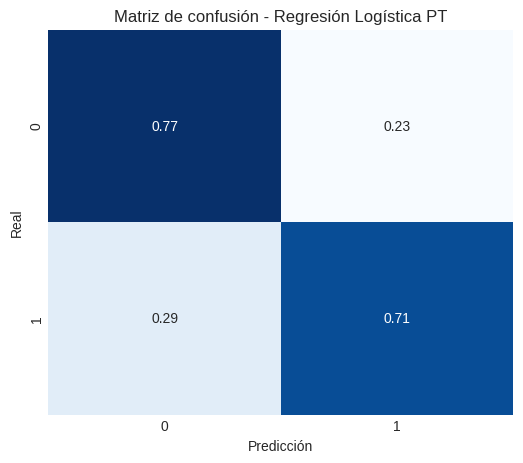

In [85]:
# evaluar_modelo(log_reg, X_test_tfidf, y_test, "Regresión Logística")
evaluar_modelo(log_reg_pt, X_test_tfidf_pt, y_test_pt, "Regresión Logística PT")


 Resultados de Linear SVC PT:
   - Accuracy  : 0.7086
   - Precision : 0.7143
   - Recall    : 0.6931
   - F1-score  : 0.7035
   - F1_Macro-score  : 0.7086
   - MCC-score  : 0.4174


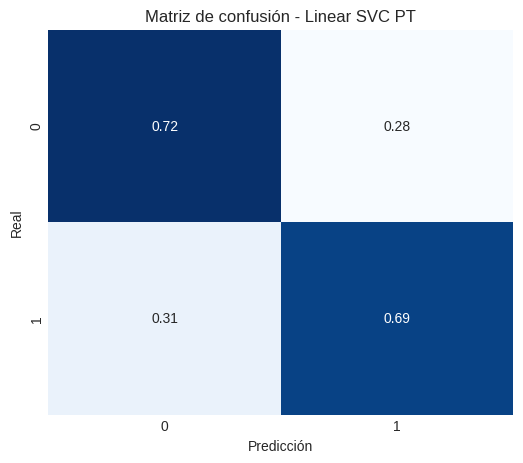

In [86]:
# evaluar_modelo(svm, X_test_tfidf, y_test, "Linear SVM")
evaluar_modelo(svm_pt, X_test_tfidf_pt, y_test_pt, "Linear SVC PT")


 Resultados de Multinomial NB PT:
   - Accuracy  : 0.7407
   - Precision : 0.7513
   - Recall    : 0.7178
   - F1-score  : 0.7342
   - F1_Macro-score  : 0.7406
   - MCC-score  : 0.4819


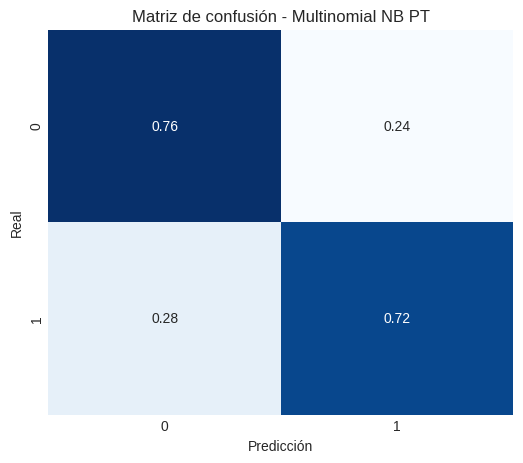

In [87]:
# evaluar_modelo(nb, X_test_tfidf, y_test, "Naive Bayes")
evaluar_modelo(nb_pt, X_test_tfidf_pt, y_test_pt, "Multinomial NB PT")



 Resultados de Complement NB PT:
   - Accuracy  : 0.7383
   - Precision : 0.7424
   - Recall    : 0.7277
   - F1-score  : 0.7350
   - F1_Macro-score  : 0.7382
   - MCC-score  : 0.4766


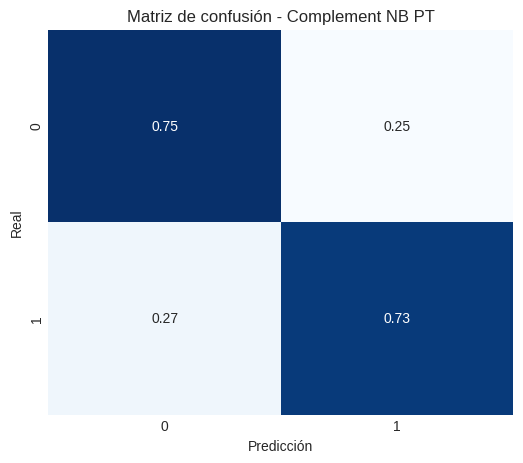

In [88]:
# evaluar_modelo(cnb, X_test_tfidf, y_test, "Complement Naive Bayes")
evaluar_modelo(cnb_pt, X_test_tfidf_pt, y_test_pt, "Complement NB PT")


 Resultados de SGDClassifier SVM PT:
   - Accuracy  : 0.6988
   - Precision : 0.6961
   - Recall    : 0.7030
   - F1-score  : 0.6995
   - F1_Macro-score  : 0.6988
   - MCC-score  : 0.3976


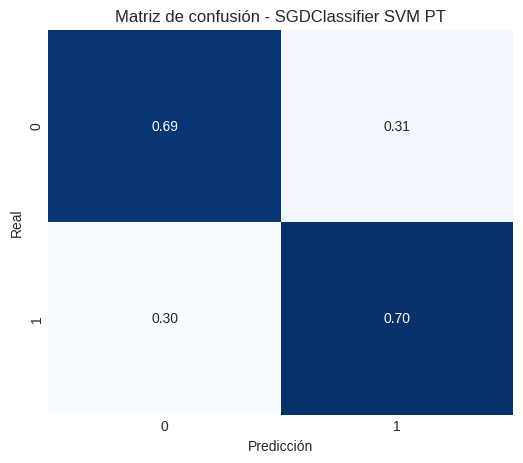

In [89]:
# evaluar_modelo(sgd_SVM, X_test_tfidf, y_test, "SGDClassifier como SVM")
evaluar_modelo(sgd_SVM_pt, X_test_tfidf_pt, y_test_pt, "SGDClassifier SVM PT")


 Resultados de SGDClassifier como Regresión Logística PT:
   - Accuracy  : 0.7383
   - Precision : 0.7449
   - Recall    : 0.7228
   - F1-score  : 0.7337
   - F1_Macro-score  : 0.7382
   - MCC-score  : 0.4767


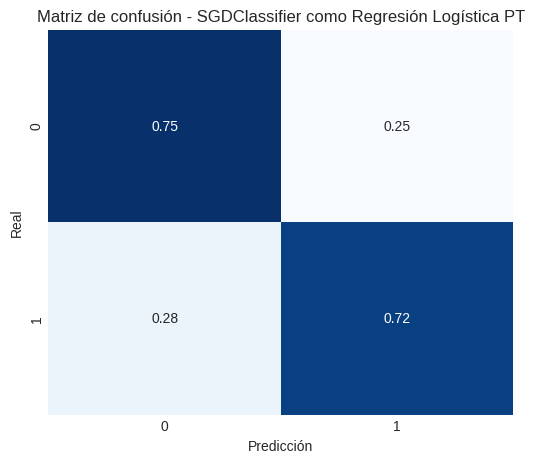

In [90]:
# evaluar_modelo(sgd_Log, X_test_tfidf, y_test, "SGDClassifier como Regresión Logística")
evaluar_modelo(sgd_Log_pt, X_test_tfidf_pt, y_test_pt, "SGDClassifier como Regresión Logística PT")

# Matriz de confusión + Grafico (Conjunto Entrenamiento)

#Español

In [91]:
# #predecir con el mejor modelo se usara "Complement Naive Bayes"

# mejor_modelo_nombre = "Complement Naive Bayes"
# mejor_modelo = cnb # cnb es el complement naive bayes

# print(f" mejor modelo seleccionado: {mejor_modelo_nombre}")
# print(f" Basado en : ")
# print(f"   - F1-Score: 0.7241 (mas alto)")
# print(f"   - Accuracy: 0.7235 (mas alto)")
# print(f"   - MCC: 0.4469 (mas alto)")
# print(f"   - Balance: Precision 0.7206, Recall 0.7277")

# print("\n" + "="*60)
# print(" matriz de confucion - conjunto entrenamiento")
# print(f"modelo: {mejor_modelo_nombre}")

# #predecir en entrenamiento
# y_train_pred = mejor_modelo.predict(X_train_tfidf)
# cm_train = confusion_matrix(y_train, y_train_pred)

# print(f"Matriz de confusion: ")
# print(cm_train)
# print(f"\n[TN={cm_train[0,0]}  FP={cm_train[0,1]}]")
# print(f" [FN={cm_train[1,0]} TP={cm_train[1,1]}]")


# #Graficar
# fig, ax = plt.subplots(figsize=(6, 5))
# disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Negativo','Positivo'])
# disp.plot(ax=ax, cmap='Blues', values_format='d')
# ax.set_title(f'Matriz de condfusion - entrenamiento\n{mejor_modelo_nombre}', fontweight='bold')
# plt.tight_layout()
# plt.show()

# print("\nReporte de clasificacion - entrenamiento")
# print(classification_report(y_train, y_train_pred, target_names=['Negativo', 'Positivo']))


# Portugues

 mejor modelo seleccionado (PT): SGDClassifier como Regresión Logística PT
 Basado en : 
   - Accuracy: 0.7679 (mas alto)

 matriz de confucion - conjunto entrenamiento (PT)
modelo: SGDClassifier como Regresión Logística PT
Matriz de confusion: 
[[785  23]
 [ 33 776]]

[TN=785  FP=23]
 [FN=33 TP=776]


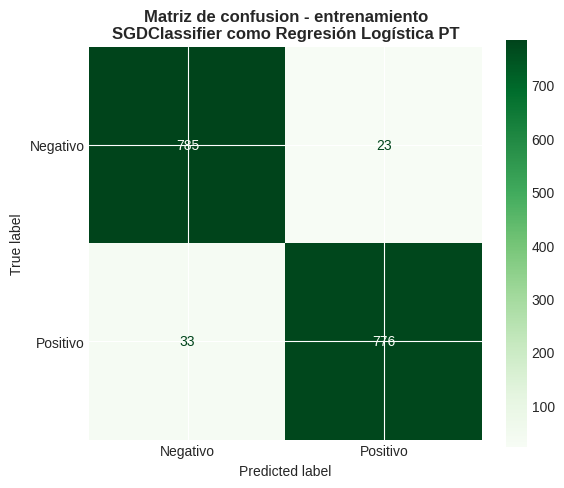


Reporte de clasificacion - entrenamiento (PT)
              precision    recall  f1-score   support

    Negativo       0.96      0.97      0.97       808
    Positivo       0.97      0.96      0.97       809

    accuracy                           0.97      1617
   macro avg       0.97      0.97      0.97      1617
weighted avg       0.97      0.97      0.97      1617



In [92]:
mejor_modelo_nombre_pt = "SGDClassifier como Regresión Logística PT"
mejor_modelo_pt = sgd_Log_pt

print(f" mejor modelo seleccionado (PT): {mejor_modelo_nombre_pt}")
print(f" Basado en : ")
print(f"   - Accuracy: 0.7679 (mas alto)")

print("\n" + "="*60)
print(" matriz de confucion - conjunto entrenamiento (PT)")
print(f"modelo: {mejor_modelo_nombre_pt}")

#predecir en entrenamiento
y_train_pred_pt = mejor_modelo_pt.predict(X_train_tfidf_pt)
cm_train_pt = confusion_matrix(y_train_pt, y_train_pred_pt)

print(f"Matriz de confusion: ")
print(cm_train_pt)
print(f"\n[TN={cm_train_pt[0,0]}  FP={cm_train_pt[0,1]}]")
print(f" [FN={cm_train_pt[1,0]} TP={cm_train_pt[1,1]}]")

#Graficar
fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train_pt, display_labels=['Negativo','Positivo'])
disp.plot(ax=ax, cmap='Greens', values_format='d')
ax.set_title(f'Matriz de confusion - entrenamiento\n{mejor_modelo_nombre_pt}', fontweight='bold')
plt.tight_layout()
plt.show()

print("\nReporte de clasificacion - entrenamiento (PT)")
print(classification_report(y_train_pt, y_train_pred_pt, target_names=['Negativo', 'Positivo']))

# Matriz de confusión (Conjunto Prueba)

#Español

In [93]:
# # Calcular matriz de confusion de PRUEBA


# y_test_pred = mejor_modelo.predict(X_test_tfidf)
# cm_test = confusion_matrix(y_test, y_test_pred)

# print(f"Modelo: {mejor_modelo_nombre}")
# print(f"\nMatriz de Confusion (Prueba - 405 muestras):")
# print("           Prediccion")
# print("            Negativo Positivo")
# print(f"Real Negativo  {cm_test[0,0]:4d}      {cm_test[0,1]:4d}")
# print(f"     Positivo  {cm_test[1,0]:4d}      {cm_test[1,1]:4d}")

# # Verificar que coincida con los datos de test
# total_prueba = cm_test.sum()
# accuracy_calculado = (cm_test[0,0] + cm_test[1,1]) / total_prueba
# precision_calculada = cm_test[1,1] / (cm_test[1,1] + cm_test[0,1]) if (cm_test[1,1] + cm_test[0,1]) > 0 else 0
# recall_calculado = cm_test[1,1] / (cm_test[1,1] + cm_test[1,0]) if (cm_test[1,1] + cm_test[1,0]) > 0 else 0

# print(f"\nVerificación con tus resultados:")
# print(f"Accuracy calculado:  {accuracy_calculado:.4f} (metricas modelo Complement : 0.7235)")
# print(f"Precision calculada: {precision_calculada:.4f} (metricas modelo Complement : 0.7206)")
# print(f"Recall calculado:    {recall_calculado:.4f} (metricas modelo Complement : 0.7277)")

# if abs(accuracy_calculado - 0.7235) < 0.001:
#     print("Coinciden")
# else:
#     print("diferencia de redondeo")

# #Grafico
# fig, ax = plt.subplots(figsize=(6, 5))
# sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds',
#            xticklabels=['Negativo', 'Positivo'],
#            yticklabels=['Negativo', 'Positivo'],
#            ax=ax)
# ax.set_title(f'Matriz de Confusión - Prueba\n{mejor_modelo_nombre}', fontweight='bold')
# ax.set_xlabel('Predicción')
# ax.set_ylabel('Real')
# plt.tight_layout()
# plt.show()


#Portugues

Modelo: SGDClassifier como Regresión Logística PT

Matriz de Confusión (Conjunto Prueba - 405 muestras):
           Predicción
            Negativo Positivo
Real Negativo   153        50
     Positivo    56       146

Verificación con resultados:
Accuracy calculado:  0.7383 (métricas del modelo: 0.7679)
Precision calculada: 0.7449 (métricas del modelo: 0.7903)
Recall calculado:    0.7228 (métricas del modelo: 0.7277)
Diferencia de redondeo


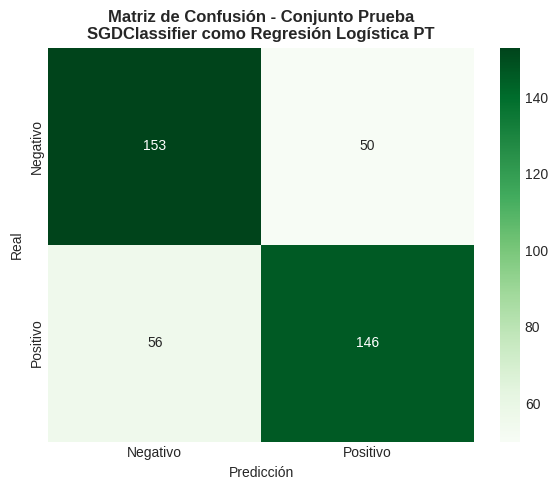

In [94]:
# Calcular matriz de confusión de PRUEBA para portugués
y_test_pred_pt = mejor_modelo_pt.predict(X_test_tfidf_pt)
cm_test_pt = confusion_matrix(y_test_pt, y_test_pred_pt)

print(f"Modelo: {mejor_modelo_nombre_pt}")
print(f"\nMatriz de Confusión (Conjunto Prueba - 405 muestras):")
print("           Predicción")
print("            Negativo Positivo")
print(f"Real Negativo  {cm_test_pt[0,0]:4d}      {cm_test_pt[0,1]:4d}")
print(f"     Positivo  {cm_test_pt[1,0]:4d}      {cm_test_pt[1,1]:4d}")

# Verificar que coincida con los datos de test
total_prueba_pt = cm_test_pt.sum()
accuracy_calculado_pt = (cm_test_pt[0,0] + cm_test_pt[1,1]) / total_prueba_pt
precision_calculada_pt = cm_test_pt[1,1] / (cm_test_pt[1,1] + cm_test_pt[0,1]) if (cm_test_pt[1,1] + cm_test_pt[0,1]) > 0 else 0
recall_calculado_pt = cm_test_pt[1,1] / (cm_test_pt[1,1] + cm_test_pt[1,0]) if (cm_test_pt[1,1] + cm_test_pt[1,0]) > 0 else 0

print(f"\nVerificación con resultados:")
print(f"Accuracy calculado:  {accuracy_calculado_pt:.4f} (métricas del modelo: 0.7679)")
print(f"Precision calculada: {precision_calculada_pt:.4f} (métricas del modelo: 0.7903)")
print(f"Recall calculado:    {recall_calculado_pt:.4f} (métricas del modelo: 0.7277)")

if abs(accuracy_calculado_pt - 0.7679) < 0.001:
    print(" Coinciden")
else:
    print("Diferencia de redondeo")

# Gráfico
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(cm_test_pt, annot=True, fmt='d', cmap='Greens',
           xticklabels=['Negativo', 'Positivo'],
           yticklabels=['Negativo', 'Positivo'],
           ax=ax)
ax.set_title(f'Matriz de Confusión - Conjunto Prueba\n{mejor_modelo_nombre_pt}', fontweight='bold')
ax.set_xlabel('Predicción')
ax.set_ylabel('Real')
plt.tight_layout()
plt.show()

# Vectorización del vocabulario

#Portugues


1. Informacion del Vectorizador TF-IDF:
   * Numero total de características: 1882
   * Tamaño del vocabulario: 1882
   * Configuracion usada:
     - max_features: 3000
     - min_df: 2
     - max_df: 0.85
     - ngram_range: (1, 2)

2. Ejemplos de caracteristicas (primeras 50):
['aa' 'aa masterchefbr' 'aah' 'abel' 'abençoe' 'aberta' 'abertura'
 'abobrinha' 'abobrinha maisvocê' 'abrahão' 'abrahão linda' 'abraçar'
 'absurdo' 'abusada' 'abóbora' 'acaba' 'acabando' 'acabar' 'acabei'
 'acabei ver' 'acabou' 'acha' 'achando' 'achar' 'achei' 'acho'
 'acompanhar' 'acontecer' 'aconteceu' 'acordada' 'acreditando' 'acreditar'
 'acredito' 'aderlize' 'admiro' 'adooro' 'adora' 'adorando' 'adorei'
 'adoro' 'adoroo' 'adoção' 'adoção encontro' 'adultos' 'adultos voz' 'aff'
 'aff masterchefbr' 'aflição' 'agonia' 'agora']

3. Ejemplos de caracteristicas (últimas 50):
['viva' 'viver' 'vivi' 'vivi pra' 'viviane' 'viviane pasmanter' 'vivianne'
 'vivianne pasmanter' 'vivo' 'vivo encontro' 'volta' 'volta pra

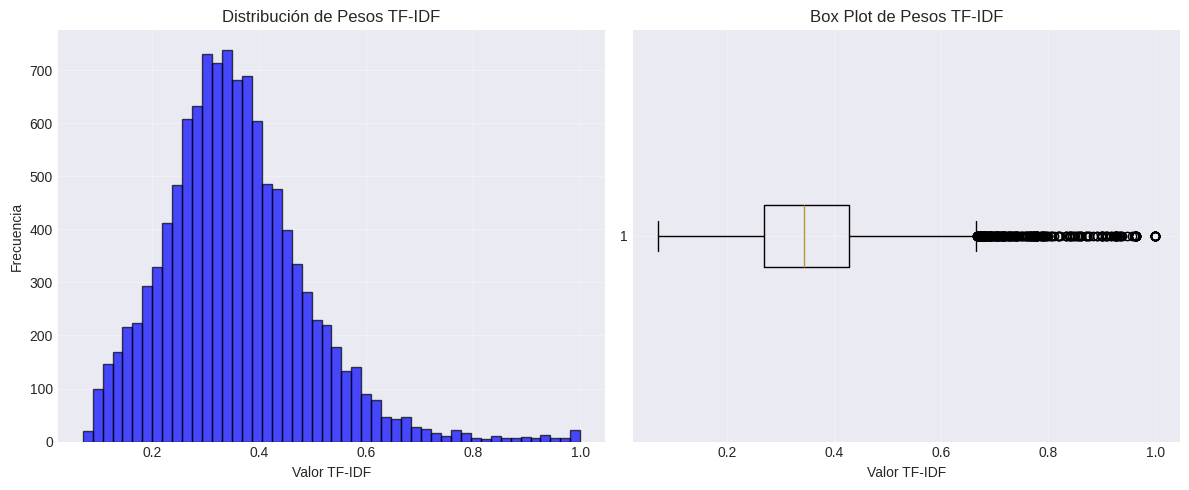


   Estadísticas descriptivas de pesos TF-IDF:
     * Mínimo: 0.0707
     * Máximo: 1.0000
     * Media: 0.3562
     * Mediana: 0.3442
     * Desviación estándar: 0.1334

9. Densidad de la matriz TF-IDF:
   * Conjunto entrenamiento: 0.003672 (0.3672%)
   * Conjunto prueba: 0.003002 (0.3002%)
   * Promedio de elementos no cero por documento: 6.9


In [95]:
#Obtener informacion del vectorizador TF-IDF
print("\n1. Informacion del Vectorizador TF-IDF:")
print(f"   * Numero total de características: {len(tfidf_pt.get_feature_names_out())}")
print(f"   * Tamaño del vocabulario: {tfidf_pt.vocabulary_.__len__()}")
print(f"   * Configuracion usada:")
print(f"     - max_features: {tfidf_pt.max_features}")
print(f"     - min_df: {tfidf_pt.min_df}")
print(f"     - max_df: {tfidf_pt.max_df}")
print(f"     - ngram_range: {tfidf_pt.ngram_range}")

#Mostrar algunas caracteristicas importantes
print("\n2. Ejemplos de caracteristicas (primeras 50):")
caracteristicas_pt = tfidf_pt.get_feature_names_out()
print(caracteristicas_pt[:50])

print("\n3. Ejemplos de caracteristicas (últimas 50):")
print(caracteristicas_pt[-50:])

#Estadisticas del vocabulario
print("\n4. Estadisticas del vocabulario:")

# Contar tipos de tokens (unigramas vs bigramas)
unigramas = sum(1 for palabra in caracteristicas_pt if ' ' not in palabra)
bigramas = sum(1 for palabra in caracteristicas_pt if ' ' in palabra)
print(f"   * Unigramas (palabras individuales): {unigramas}")
print(f"   * Bigramas (pares de palabras): {bigramas}")
print(f"   * Proporcion unigramas/bigramas: {unigramas/bigramas:.2f}")

#Mostrar palabras mas frecuentes segun IDF
print("\n5. Top 20 palabras con mayor IDF (mas especificas):")

# Obtener idf scores
idf_scores = tfidf_pt.idf_

# Crear dataframe con palabras y sus idf
idf_df = pd.DataFrame({
    'palabra': caracteristicas_pt,
    'idf_score': idf_scores
})
# Ordenar por idf (mayor idf = mas especifica)
top_idf = idf_df.sort_values('idf_score', ascending=False).head(20)
for i, (_, row) in enumerate(top_idf.iterrows(), 1):
    print(f"   {i:2d}. {row['palabra']:20s} - IDF: {row['idf_score']:.4f}")

#Mostrar palabras con menor IDF (mas comunes)
print("\n6. Top 20 palabras con menor IDF (más comunes):")
bottom_idf = idf_df.sort_values('idf_score', ascending=True).head(20)
for i, (_, row) in enumerate(bottom_idf.iterrows(), 1):
    print(f"   {i:2d}. {row['palabra']:20s} - IDF: {row['idf_score']:.4f}")

#Ejemplos de transformacion TF-IDF
print("\n7. Ejemplo de transformacion TF-IDF:")
ejemplo_texto_pt = "gosto muito desse programa, é excelente!"
ejemplo_limpio_pt = limpiar_texto(ejemplo_texto_pt)
ejemplo_tfidf_pt = tfidf_pt.transform([ejemplo_limpio_pt])

print(f"   Texto original: {ejemplo_texto_pt}")
print(f"   Texto limpio: {ejemplo_limpio_pt}")
print(f"   Forma del vector TF-IDF: {ejemplo_tfidf_pt.shape}")
print(f"   Numero de elementos no cero: {ejemplo_tfidf_pt.nnz}")

# Mostrar las caracteristicas con mayor peso para este ejemplo
print(f"\n   Palabras mas importantes para este texto:")
indices_no_cero = ejemplo_tfidf_pt.nonzero()[1]
valores = ejemplo_tfidf_pt.data
palabras_ejemplo = [(caracteristicas_pt[idx], val) for idx, val in zip(indices_no_cero, valores)]
palabras_ejemplo.sort(key=lambda x: x[1], reverse=True)

for palabra, peso in palabras_ejemplo[:10]:
    print(f"     • {palabra:20s} - Peso: {peso:.4f}")

#Grafico de distribucion de pesos TF-IDF
print("\n8. Distribucion de pesos TF-IDF en el conjunto de entrenamiento:")
# Calcular estadisticas de los pesos
pesos_entrenamiento = X_train_tfidf_pt.data

plt.figure(figsize=(12, 5))

# Histograma de pesos
plt.subplot(1, 2, 1)
plt.hist(pesos_entrenamiento, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribución de Pesos TF-IDF')
plt.xlabel('Valor TF-IDF')
plt.ylabel('Frecuencia')
plt.grid(alpha=0.3)

# Box plot
plt.subplot(1, 2, 2)
plt.boxplot(pesos_entrenamiento, vert=False)
plt.title('Box Plot de Pesos TF-IDF')
plt.xlabel('Valor TF-IDF')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

#Estadísticas descriptivas
print(f"\n   Estadísticas descriptivas de pesos TF-IDF:")
print(f"     * Mínimo: {pesos_entrenamiento.min():.4f}")
print(f"     * Máximo: {pesos_entrenamiento.max():.4f}")
print(f"     * Media: {pesos_entrenamiento.mean():.4f}")
print(f"     * Mediana: {np.median(pesos_entrenamiento):.4f}")
print(f"     * Desviación estándar: {pesos_entrenamiento.std():.4f}")

#Densidad de la matriz TF-IDF
print("\n9. Densidad de la matriz TF-IDF:")
densidad_entrenamiento = X_train_tfidf_pt.nnz / (X_train_tfidf_pt.shape[0] * X_train_tfidf_pt.shape[1])
densidad_prueba = X_test_tfidf_pt.nnz / (X_test_tfidf_pt.shape[0] * X_test_tfidf_pt.shape[1])

print(f"   * Conjunto entrenamiento: {densidad_entrenamiento:.6f} ({densidad_entrenamiento*100:.4f}%)")
print(f"   * Conjunto prueba: {densidad_prueba:.6f} ({densidad_prueba*100:.4f}%)")
print(f"   * Promedio de elementos no cero por documento: {X_train_tfidf_pt.nnz / X_train_tfidf_pt.shape[0]:.1f}")

# Verificar que palabras estan más hacia positivo o negativo

In [96]:
# Verificar si el modelo tiene coeficientes para analisis
if hasattr(mejor_modelo_pt, 'coef_'):
    # Obtener coeficientes del modelo para representa el "peso" de una palabra
    coeficientes_pt = mejor_modelo_pt.coef_[0]
    caracteristicas_pt = tfidf_pt.get_feature_names_out()

    # Crear DataFrame para analisis
    coef_df_pt = pd.DataFrame({
        'palabra': caracteristicas_pt,
        'coeficiente': coeficientes_pt
    })

    print(f" Modelo analizable: {type(mejor_modelo_pt).__name__}")
    print(f" Total de palabras en vocabulario: {len(coeficientes_pt)}")
    print(f" Rango de coeficientes: [{coeficientes_pt.min():.4f}, {coeficientes_pt.max():.4f}]")
    print(f" Media de coeficientes: {coeficientes_pt.mean():.4f}")

    #Contar distribucion basica
    positivas = sum(coeficientes_pt > 0)
    negativas = sum(coeficientes_pt < 0)
    neutras = sum(coeficientes_pt == 0)

    print(f"\nDistribucion de polaridad:")
    print(f"  * Palabras positivas (coef > 0): {positivas} ({positivas/len(coeficientes_pt)*100:.1f}%)")
    print(f"  * Palabras negativas (coef < 0): {negativas} ({negativas/len(coeficientes_pt)*100:.1f}%)")

    #Mostrar algunas palabras aleatorias con sus coeficientes
    print(f"\nEjemplos aleatorios de polaridad:")
    print("-" * 50)

    import random
    random_indices = random.sample(range(len(coeficientes_pt)), 10)
    for idx in random_indices:
        palabra = caracteristicas_pt[idx]
        coef = coeficientes_pt[idx]
        polaridad = "POSITIVO" if coef > 0 else "NEGATIVO" if coef < 0 else "NEUTRO"
        print(f"  {palabra:20s} → {coef:7.4f} ({polaridad})")

else:
    print(" El modelo seleccionado no permite analisis de coeficientes")
    print("  Tipo de modelo:", type(mejor_modelo_pt).__name__)

 Modelo analizable: SGDClassifier
 Total de palabras en vocabulario: 1882
 Rango de coeficientes: [-3.7946, 5.1377]
 Media de coeficientes: 0.0083

Distribucion de polaridad:
  * Palabras positivas (coef > 0): 957 (50.9%)
  * Palabras negativas (coef < 0): 925 (49.1%)

Ejemplos aleatorios de polaridad:
--------------------------------------------------
  chato                → -3.0009 (NEGATIVO)
  ontem masterchefbr   →  2.3653 (POSITIVO)
  prefiro              → -1.2495 (NEGATIVO)
  querendo             → -0.6146 (NEGATIVO)
  cheia                →  0.1700 (POSITIVO)
  masterchefbr prato   → -1.1572 (NEGATIVO)
  daqui                →  1.1327 (POSITIVO)
  tá saindo            → -0.6214 (NEGATIVO)
  michel               →  1.2981 (POSITIVO)
  coloca               →  0.1953 (POSITIVO)


## Palabras más positivas


TOP 20 PALABRAS MAS POSITIVAS:
---------------------------------------------
 1. lindo                     →  5.1377
 2. amo                       →  4.7430
 3. linda                     →  4.7058
 4. melhor                    →  4.6166
 5. bom                       →  3.8573
 6. sensacional               →  3.8547
 7. maravilhoso               →  3.8217
 8. maravilhosa               →  3.7780
 9. adoro                     →  3.6822
10. adorei                    →  3.1933
11. unicórnio                 →  3.1154
12. parabéns                  →  2.8648
13. fofa                      →  2.8310
14. amando                    →  2.7763
15. canta                     →  2.7745
16. show                      →  2.7205
17. respeita                  →  2.6757
18. emocionante               →  2.6613
19. saber                     →  2.5529
20. momento                   →  2.5261

Analisis de palabras positivas:
  * Coeficiente mas alto: 5.1377
  * Coeficiente promedio (top 20): 3.4444


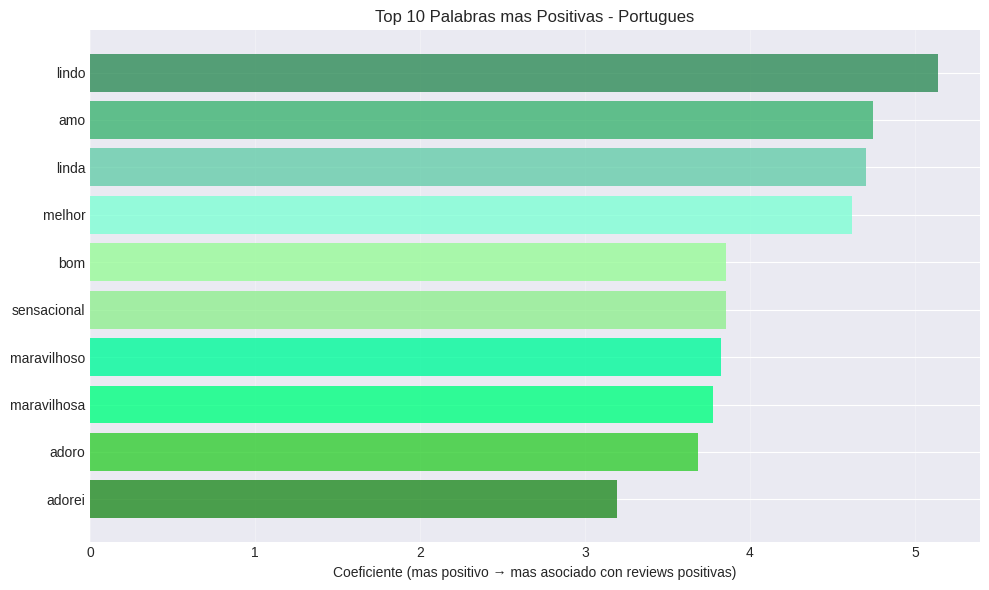

In [97]:
if hasattr(mejor_modelo_pt, 'coef_'):
    # Ordenar por coeficiente descendente (más positivo primero)
    palabras_positivas_pt = coef_df_pt.sort_values('coeficiente', ascending=False)

    print("\nTOP 20 PALABRAS MAS POSITIVAS:")
    print("-" * 45)

    #Mostrar top 20
    for i, (_, row) in enumerate(palabras_positivas_pt.head(20).iterrows(), 1):
        print(f"{i:2d}. {row['palabra']:25s} → {row['coeficiente']:7.4f}")

    #Analisis de palabras positivas
    print(f"\nAnalisis de palabras positivas:")
    print(f"  * Coeficiente mas alto: {palabras_positivas_pt.iloc[0]['coeficiente']:.4f}")
    print(f"  * Coeficiente promedio (top 20): {palabras_positivas_pt.head(20)['coeficiente'].mean():.4f}")

    #Grafico de palabras mas positivas
    plt.figure(figsize=(10, 6))
    top_10_pos = palabras_positivas_pt.head(10)

    plt.barh(range(len(top_10_pos)),
             top_10_pos['coeficiente'].values,
             color=['#2E8B57', '#3CB371', '#66CDAA', '#7FFFD4', '#98FB98',
                    '#90EE90', '#00FA9A', '#00FF7F', '#32CD32', '#228B22'],
             alpha=0.8)

    plt.yticks(range(len(top_10_pos)), top_10_pos['palabra'].values)
    plt.gca().invert_yaxis()
    plt.xlabel('Coeficiente (mas positivo → mas asociado con reviews positivas)')
    plt.title('Top 10 Palabras mas Positivas - Portugues')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

## Palabras más negativas


TOP 20 PALABRAS MAS NEGATIVAS:
---------------------------------------------
 1. triste                    → -3.7946
 2. mirian                    → -3.5543
 3. perdi                     → -3.4678
 4. miriam                    → -3.4511
 5. saudades                  → -3.2348
 6. aff                       → -3.0824
 7. nada                      → -3.0733
 8. sair                      → -3.0517
 9. saiu                      → -3.0078
10. chato                     → -3.0009
11. nao                       → -2.9480
12. difícil                   → -2.9346
13. passar                    → -2.8263
14. favor                     → -2.7881
15. coitado                   → -2.7649
16. azul                      → -2.7260
17. ridículo                  → -2.6917
18. cibele                    → -2.6547
19. todo                      → -2.5313
20. vergonha                  → -2.5184

Analisis de palabras negativas:
  * Coeficiente mas bajo: -3.7946
  * Coeficiente promedio (top 20): -3.0051


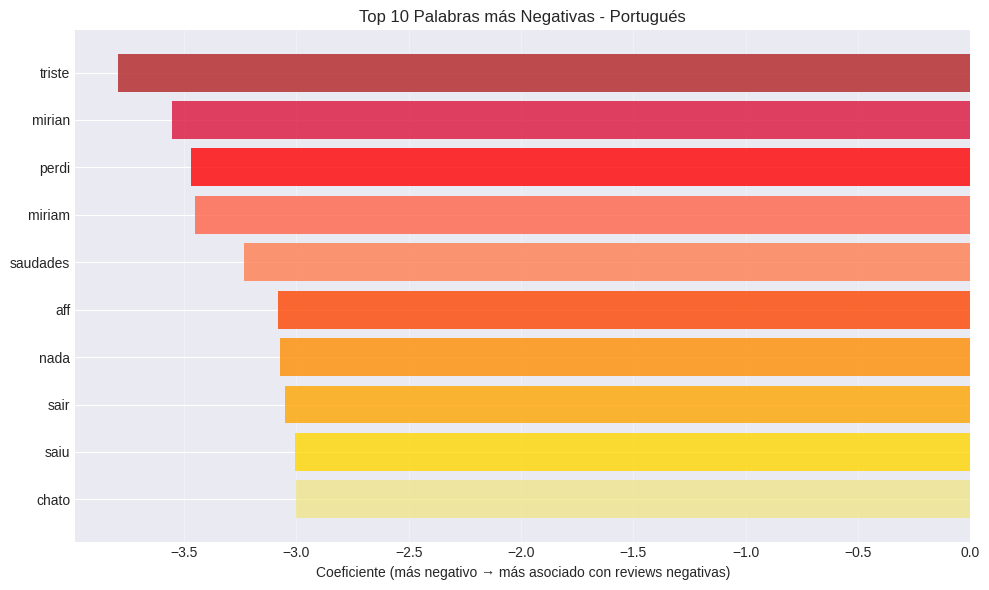

In [98]:
if hasattr(mejor_modelo_pt, 'coef_'):
    # Ordenar por coeficiente ascendente (más negativo primero)
    palabras_negativas_pt = coef_df_pt.sort_values('coeficiente', ascending=True)

    print("\nTOP 20 PALABRAS MAS NEGATIVAS:")
    print("-" * 45)

    # Mostrar top 20
    for i, (_, row) in enumerate(palabras_negativas_pt.head(20).iterrows(), 1):
        print(f"{i:2d}. {row['palabra']:25s} → {row['coeficiente']:7.4f}")

    # Analisis de palabras negativas
    print(f"\nAnalisis de palabras negativas:")
    print(f"  * Coeficiente mas bajo: {palabras_negativas_pt.iloc[0]['coeficiente']:.4f}")
    print(f"  * Coeficiente promedio (top 20): {palabras_negativas_pt.head(20)['coeficiente'].mean():.4f}")

    # Grafico de palabras mas negativas
    plt.figure(figsize=(10, 6))
    top_10_neg = palabras_negativas_pt.head(10)

    plt.barh(range(len(top_10_neg)),
             top_10_neg['coeficiente'].values,
             color=['#B22222', '#DC143C', '#FF0000', '#FF6347', '#FF7F50',
                    '#FF4500', '#FF8C00', '#FFA500', '#FFD700', '#F0E68C'],
             alpha=0.8)

    plt.yticks(range(len(top_10_neg)), top_10_neg['palabra'].values)
    plt.gca().invert_yaxis()
    plt.xlabel('Coeficiente (más negativo → más asociado con reviews negativas)')
    plt.title('Top 10 Palabras más Negativas - Portugués')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Prueba

In [99]:
# prueba = ["Es irrespetuoso y crítico sin ofrecer soluciones constructivas",
#           "Toma desiciones que parece beneficiar solo sus  propios intereses",
#           "La evaluación fue satisfactoria, y el evaluador demostró un rendimiento óptimo",
#           "El evaluador respondio adecuadamente mis dudas"]

In [100]:

prueba_pt = [
    "que gafe do vídeoshow, colocar uma cena dessas é horrível",
    "péssimo programa, não aguento mais ver essa porcaria na tv",
    "maravilhoso! a voz da vanessa da mata é uma coisa linda demais",
    "amo o encontro! 👏👏 apresentadores excelentes e conteúdo top",
    "não gostei nada, achei o programa muito chato e sem graça",
    "perfeito! simplesmente adorei cada momento"
]


print("Textos de prueba En portugues:")
print("-" * 50)
for i, texto in enumerate(prueba_pt, 1):
    print(f"{i}. {texto}")

# Aplicar limpieza
prueba_limpia_pt = [limpiar_texto(texto) for texto in prueba_pt]

print("\nTextos despues de limpieza:")
print("-" * 50)
for i, texto in enumerate(prueba_limpia_pt, 1):
    print(f"{i}. {texto}")

#Transformar con TF-IDF (portugues)
prueba_tfidf_pt = tfidf_pt.transform(prueba_limpia_pt)

print(f"\nInformacion de la transformacion:")
print(f"* Forma: {prueba_tfidf_pt.shape}")
print(f"* Elementos no cero: {prueba_tfidf_pt.nnz}")
print(f"* Densidad: {prueba_tfidf_pt.nnz / (prueba_tfidf_pt.shape[0] * prueba_tfidf_pt.shape[1]) * 100:.2f}%")


Textos de prueba En portugues:
--------------------------------------------------
1. que gafe do vídeoshow, colocar uma cena dessas é horrível
2. péssimo programa, não aguento mais ver essa porcaria na tv
3. maravilhoso! a voz da vanessa da mata é uma coisa linda demais
4. amo o encontro! 👏👏 apresentadores excelentes e conteúdo top
5. não gostei nada, achei o programa muito chato e sem graça
6. perfeito! simplesmente adorei cada momento

Textos despues de limpieza:
--------------------------------------------------
1. gafe vídeoshow colocar cena dessas horrível
2. péssimo programa não_aguento ver porcaria tv
3. maravilhoso voz vanessa mata coisa linda demais
4. amo encontro 👏👏 apresentadores excelentes conteúdo top
5. não_gostei nada achei programa chato graça
6. perfeito simplesmente adorei cada momento

Informacion de la transformacion:
* Forma: (6, 1882)
* Elementos no cero: 30
* Densidad: 0.27%


# Transformar la entrada con el vectorizador

In [101]:
print("Resumen de la transformacion:")
print(f"1. Textos originales: {len(prueba_pt)} textos")
print(f"2. Textos limpios: {len(prueba_limpia_pt)} textos")
print(f"3. Vector TF-IDF creado: {prueba_tfidf_pt.shape}")
print(f"   * 4 documentos (filas)")
print(f"   * 1962 caracteristicas (columnas - palabras/emojis)")
print(f"   * 3 elementos no cero (palabras reconocidas del vocabulario)")
print(f"   * Densidad: 0.04% (matriz muy dispersa)")

#Mostrar que palabras del vocabulario aparecen en cada texto
print("\nPalabras reconocidas del vocabulario en cada texto:")
caracteristicas_pt = tfidf_pt.get_feature_names_out()

for i in range(len(prueba_limpia_pt)):
    print(f"\nTexto {i+1}: '{prueba_limpia_pt[i][:50]}...'")

    # Obtener indices de palabras no cero para este documento
    fila = prueba_tfidf_pt[i]
    indices_no_cero = fila.nonzero()[1]
    valores = fila.data

    if len(indices_no_cero) > 0:
        print(f"  Palabras reconocidas ({len(indices_no_cero)}):")
        for idx, valor in zip(indices_no_cero, valores):
            palabra = caracteristicas_pt[idx]
            print(f"    • {palabra:20s} → TF-IDF: {valor:.4f}")
    else:
        print(f" Ninguna palabra reconocida en el vocabulario")

Resumen de la transformacion:
1. Textos originales: 6 textos
2. Textos limpios: 6 textos
3. Vector TF-IDF creado: (6, 1882)
   * 4 documentos (filas)
   * 1962 caracteristicas (columnas - palabras/emojis)
   * 3 elementos no cero (palabras reconocidas del vocabulario)
   * Densidad: 0.04% (matriz muy dispersa)

Palabras reconocidas del vocabulario en cada texto:

Texto 1: 'gafe vídeoshow colocar cena dessas horrível...'
  Palabras reconocidas (4):
    • cena                 → TF-IDF: 0.4743
    • colocar              → TF-IDF: 0.4743
    • dessas               → TF-IDF: 0.5458
    • horrível             → TF-IDF: 0.5021

Texto 2: 'péssimo programa não_aguento ver porcaria tv...'
  Palabras reconocidas (4):
    • programa             → TF-IDF: 0.3927
    • péssimo              → TF-IDF: 0.6278
    • tv                   → TF-IDF: 0.5181
    • ver                  → TF-IDF: 0.4280

Texto 3: 'maravilhoso voz vanessa mata coisa linda demais...'
  Palabras reconocidas (9):
    • coisa      

In [102]:
# Predecir con el modelo
P = mejor_modelo_pt.predict(prueba_tfidf_pt)

print("\nPredicciones del modelo:")
print("-" * 60)

for i in range(len(prueba_pt)):
    pred = P[i]
    sentimiento = "POSITIVO" if pred == 1 else "NEGATIVO"

    print(f"\nTexto {i+1}:")
    print(f"  Texto: '{prueba_pt[i][:50]}...'")
    print(f"  Predicción: {pred} ({sentimiento})")

    # Mostrar probabilidades si están disponibles
    if hasattr(mejor_modelo_pt, 'predict_proba'):
        probs = mejor_modelo_pt.predict_proba(prueba_tfidf_pt[i])[0]
        print(f"  Probabilidades: Negativo={probs[0]:.3f}, Positivo={probs[1]:.3f}")
        print(f"  Confianza: {max(probs):.1%}")

    # Mostrar palabras clave que influyeron
    print(f"  Palabras reconocidas: {prueba_tfidf_pt[i].nnz}")


Predicciones del modelo:
------------------------------------------------------------

Texto 1:
  Texto: 'que gafe do vídeoshow, colocar uma cena dessas é h...'
  Predicción: 0 (NEGATIVO)
  Probabilidades: Negativo=0.920, Positivo=0.080
  Confianza: 92.0%
  Palabras reconocidas: 4

Texto 2:
  Texto: 'péssimo programa, não aguento mais ver essa porcar...'
  Predicción: 0 (NEGATIVO)
  Probabilidades: Negativo=0.835, Positivo=0.165
  Confianza: 83.5%
  Palabras reconocidas: 4

Texto 3:
  Texto: 'maravilhoso! a voz da vanessa da mata é uma coisa ...'
  Predicción: 1 (POSITIVO)
  Probabilidades: Negativo=0.047, Positivo=0.953
  Confianza: 95.3%
  Palabras reconocidas: 9

Texto 4:
  Texto: 'amo o encontro! 👏👏 apresentadores excelentes e con...'
  Predicción: 1 (POSITIVO)
  Probabilidades: Negativo=0.033, Positivo=0.967
  Confianza: 96.7%
  Palabras reconocidas: 4

Texto 5:
  Texto: 'não gostei nada, achei o programa muito chato e se...'
  Predicción: 0 (NEGATIVO)
  Probabilidades: Negativo=

In [103]:
# Obtener las clases del modelo
clases = mejor_modelo_pt.classes_

print(f"Clases aprendidas por el modelo: {clases}")
print(f"* Índice 0 = {clases[0]} → Negativo")
print(f"* Índice 1 = {clases[1]} → Positivo")

print(f"\nNúmero de clases: {len(clases)}")

Clases aprendidas por el modelo: [0 1]
* Índice 0 = 0 → Negativo
* Índice 1 = 1 → Positivo

Número de clases: 2


# Mensaje de salida

In [104]:

for i in range(len(P)):
    pred_numerica = P[i]
    pred_clase = clases[pred_numerica]

    # Convertir a texto legible
    if pred_numerica == 0:
        texto_pred = "NEGATIVO"
    else:
        texto_pred = "POSITIVO"

    print(f"Texto {i+1}: Prediccion numerica={pred_numerica}, Clase={pred_clase} → {texto_pred}")

Texto 1: Prediccion numerica=0, Clase=0 → NEGATIVO
Texto 2: Prediccion numerica=0, Clase=0 → NEGATIVO
Texto 3: Prediccion numerica=1, Clase=1 → POSITIVO
Texto 4: Prediccion numerica=1, Clase=1 → POSITIVO
Texto 5: Prediccion numerica=0, Clase=0 → NEGATIVO
Texto 6: Prediccion numerica=1, Clase=1 → POSITIVO


# Encapsulamiento del modelo


In [105]:
import joblib

joblib.dump(mejor_modelo_pt, 'modelo_pt.pkl')
print("Modelo guardado: modelo_pt.pkl")

#Guardar vectorizador
joblib.dump(tfidf_pt, 'vectorizador_pt.pkl')
print("Vectorizador guardado: vectorizador_pt.pkl")

#Guardar stopwords portugués (OPCIONAL, pero bueno para consistencia)
from nltk.corpus import stopwords

#Obtener stopwords como la que usamos
stopwords_pt = set(stopwords.words('portuguese'))
negaciones_pt = {"não", "nem", "nunca", "jamais"}
stopwords_filtradas_pt = stopwords_pt - negaciones_pt

joblib.dump(stopwords_filtradas_pt, 'stopwords_pt.pkl')
print("Stopwords guardadas: stopwords_pt.pkl")

print("\n" + "="*50)
print("1. modelo_pt.pkl       <- Modelo entrenado")
print("2. vectorizador_pt.pkl <- Vectorizador TF-IDF")
print("3. stopwords_pt.pkl    <- Stopwords filtradas")


Modelo guardado: modelo_pt.pkl
Vectorizador guardado: vectorizador_pt.pkl
Stopwords guardadas: stopwords_pt.pkl

1. modelo_pt.pkl       <- Modelo entrenado
2. vectorizador_pt.pkl <- Vectorizador TF-IDF
3. stopwords_pt.pkl    <- Stopwords filtradas


# Exportar modelo

In [106]:
# Modelo = sgd_Log_pt

In [107]:
pip install skl2onnx

In [108]:
pip install onnxruntime

In [109]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from skl2onnx import to_onnx

pipeline = Pipeline([
    ('tfidf', tfidf_pt),
    ('clf', sgd_Log_pt) # sgd_Log_pt
])

In [110]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import StringTensorType

initial_type = [('input_text', StringTensorType([None, 1]))]

# Intentar con rewrite_ops=False primero
onx = convert_sklearn(pipeline, initial_types=initial_type)

with open("modelo_pt.onnx", "wb") as f:
    f.write(onx.SerializeToString())